In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from matplotlib.pyplot import figure

In [6]:
df1 = pd.read_csv("forclustering3.data", sep=" ")
X1_data = df1.iloc[:, 0]
Y1_data = df1.iloc[:, 1]
df1


,x0,x1,x2
0,0.0,8.0,0.0
1,1.0,9.0,0.0
2,1.0,10.0,1.0
3,2.0,8.5,0.0
4,3.0,10.0,0.0
5,4.0,13.0,0.0
6,8.0,0.0,0.0
7,11.0,11.0,11.0
8,11.0,10.0,11.0
9,9.0,2.0,0.0


In [7]:
def choose_centroids(data, input_indexes):
    centroids = []
    for i in range(len(input_indexes)):
        centroids.append(data.iloc[int(input_indexes[i])].values)
    return centroids 

In [8]:
def random_centroids(data, k):
    centroids = (data.sample(n=k)).values
    return centroids 

In [10]:
def nearest(lst, target):
    return min(lst, key=lambda x: sum([abs(x[j] - target[j]) for j in range(len(target))])) # miknovsky
    #return min(lst, key=lambda x: sum([(x[j] - target[j])**2 for j in range(len(target))])**0.5) # manhatan
    #return min(lst, key=lambda x: max([(abs(x[j] - target[j])) for j in range(len(target))]))
    #return min(lst, key=lambda x: sum([(abs(x[j] - target[j]) / (abs(x[j]) + abs(target[j]))) for j in range(len(target))]))

In [11]:
def calculate_nearest_centroid(centroids, points):
    list_centr = [[] for i in range(len(centroids))] # [[][][]]
    
    for i in range(len(points)):
        near = nearest(centroids, points[i])
        print(near)
        index = np.where(np.all(centroids == np.array(near), axis=1))[0][0]
        list_centr[index].append(i)
    return list_centr

In [12]:
def recalculate(dataframe, centroids, clusters):
    new_centroids = centroids.copy()
    for i in range(len(centroids)): # REMAKE!
        for j in range(len(centroids[0])):
            new_centroids[i][j] = np.mean(dataframe.iloc[:, j][clusters[i]])
    return new_centroids

In [13]:
def k_means(dataframe, k, centroids=None):
    
    
    values = dataframe.values.tolist()
    if centroids == None:
        centroids = random_centroids(dataframe, k)
    else:
        centroids = choose_centroids(dataframe, centroids)
        
    clusters = calculate_nearest_centroid(centroids, values)
    new_centroids = recalculate(dataframe, centroids, clusters)
    
    while np.linalg.norm(np.array(centroids) - np.array(new_centroids)) > 1e-6:
        
        centroids = new_centroids
        new_centroids = recalculate(dataframe, centroids, clusters)
        clusters = calculate_nearest_centroid(new_centroids, values)    
        print(np.linalg.norm(np.array(centroids) - np.array(new_centroids)))
    return clusters, new_centroids

[2.  8.5 0. ]
[2.  8.5 0. ]
[ 3. 10.  0.]
[2.  8.5 0. ]
[ 3. 10.  0.]
[ 3. 10.  0.]
[0.1 0.1 1. ]
[ 3. 10.  0.]
[ 3. 10.  0.]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[2.  8.5 0. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[0.1 0.1 1. ]
[ 3. 10.  0.]
[ 3. 10.  0.]
[2.  8.5 0. ]
[ 3. 10.  0.]
[array([4.53157895, 0.47894737, 4.02631579]), array([2.2, 7.9, 2. ]), array([ 7.375, 10.25 ,  6.25 ])]


<IPython.core.display.Javascript object>


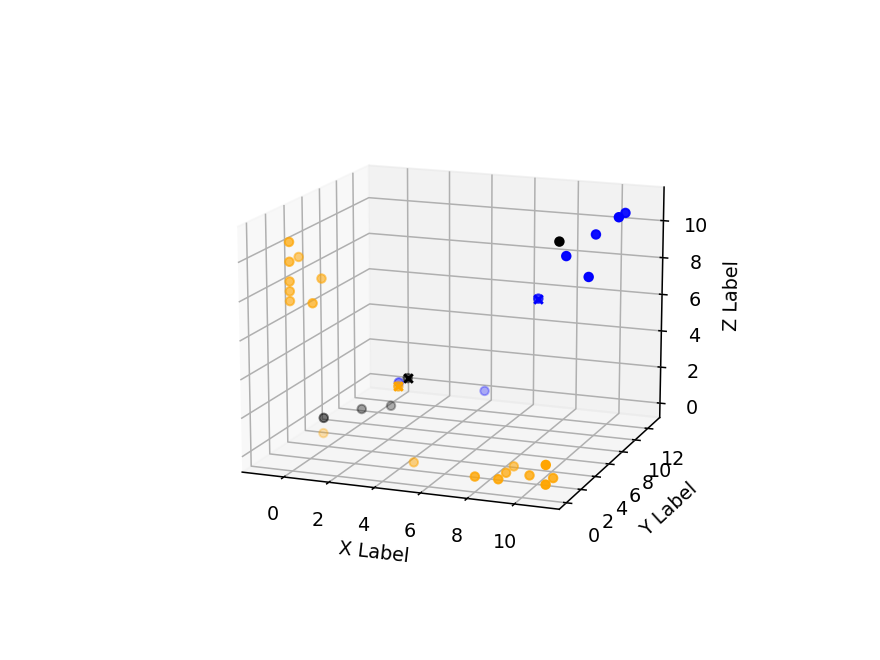

Text(0.5, 0, 'Z Label')

In [14]:
clusters, centroids = k_means(df1, 3, [18,3,4])
print(centroids)
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
colors = ['orange', 'black', 'blue', 'red', 'green']


j = 0 
for cluster in clusters:
    x = df1.iloc[:, 0][cluster]
    y = df1.iloc[:, 1][cluster]
    z = df1.iloc[:, 2][cluster]
    ax.scatter(x, y, z, color=colors[j])
    j+=1

j = 0
for i in centroids:
    #print(i[0], i[1], i[2])
    ax.scatter(i[0], i[1], i[2], marker='x', color=colors[j])
    j= j + 1
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# [[x][y]][[x][y]]
